Copyright (c) 2023, Troy Phat Tran (Mr. Troy).<br>
Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST<br>
datasets. MNIST dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

Question:

Create a classifier for the MNIST dataset which includes black-and-white images of 10 digits (0-9). The input shape<br>
should be (28, 28, 1)

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import Sequential
from keras.saving import load_model
from matplotlib import pyplot as plt

Use Tensorflow datasets

In [9]:
def my_model():
    # Load the MNIST dataset
    (train_ds, test_ds), info = tfds.load(name='mnist', split=['train', 'test'], with_info=True, as_supervised=True)

    # Preprocess the training data
    train_ds = train_ds.map(normalize).cache().shuffle(info.splits['train'].num_examples).batch(32)

    # Preprocess the test data
    test_ds = test_ds.map(normalize).cache().batch(32)

    # Define the model architecture
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Define the early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, min_delta=0.001)

    # Train the model
    history = model.fit(
        x=train_ds,
        validation_data=test_ds,
        callbacks=[early_stopping],
        epochs=10
    )
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
     
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    return model

A function to normalize the data

In [10]:
def normalize(image, label):
    return tf.cast(x=image, dtype=tf.float32) / 255.0, label

===============DO NOT EDIT THIS PART================================

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.1432 - acc: 0.9567 - val_loss: 0.0506 - val_acc: 0.9818
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0629 - acc: 0.9819 - val_loss: 0.0590 - val_acc: 0.9838
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0662 - acc: 0.9829 - val_loss: 0.0740 - val_acc: 0.9834
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1130 - acc: 0.9826 - val_loss: 0.1610 - val_acc: 0.9810
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2159 - acc: 0.9813 - val_loss: 0.6602 - val_acc: 0.9670
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4299 - acc: 0.9828 - val_loss: 0.8808 - val_acc: 0.9769
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.0758 - acc: 0.9801 - val_loss: 1.3005 - val_acc: 0.9787
Epoch 7: early stopping


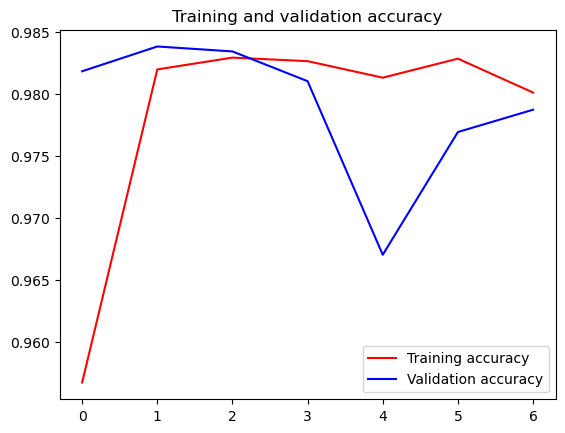

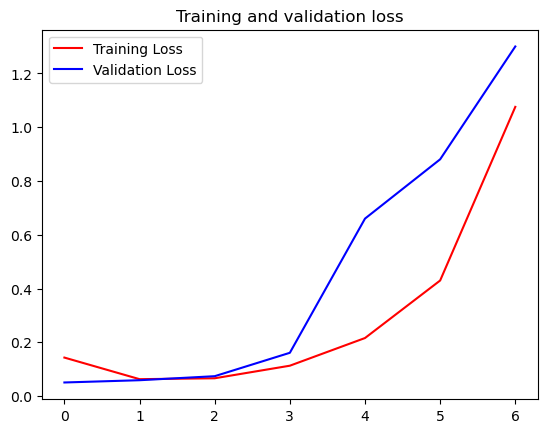

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
if __name__ == '__main__':
    # Run and save your model
    my_model = my_model()
    filepath = "grayscale_model_2.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)

    # Show the model architecture
    saved_model.summary()